# Experimenting with different performance metrics
In this notebook, we will experiment with different performance metrics. Here we will assume two hypothetical pdfs for positive and negative class and then based on that we will calculate the performance metrics of a Bayesian classifier.

Performance metrics of Bayes Classifier when class pdfs are Gaussian can be calclulated theorectically. But here we will go with the analytical approach and use simulation to calculate the performance metrics.

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Following are the pdfs for the postive and negative class.

In [212]:
parameters0 = {'mean': 0, 'variance': 1, 'prior': 0.95}
parameters1 = {'mean': 1, 'variance': 1, 'prior': 0.05}

## Visualization of the pdfs
We can plot the pdfs to have a look at the shape of the pdfs. This will help us further when we will generate the data from the pdfs.

In [213]:
# lets plot the gaussains for class 0 and class 1
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

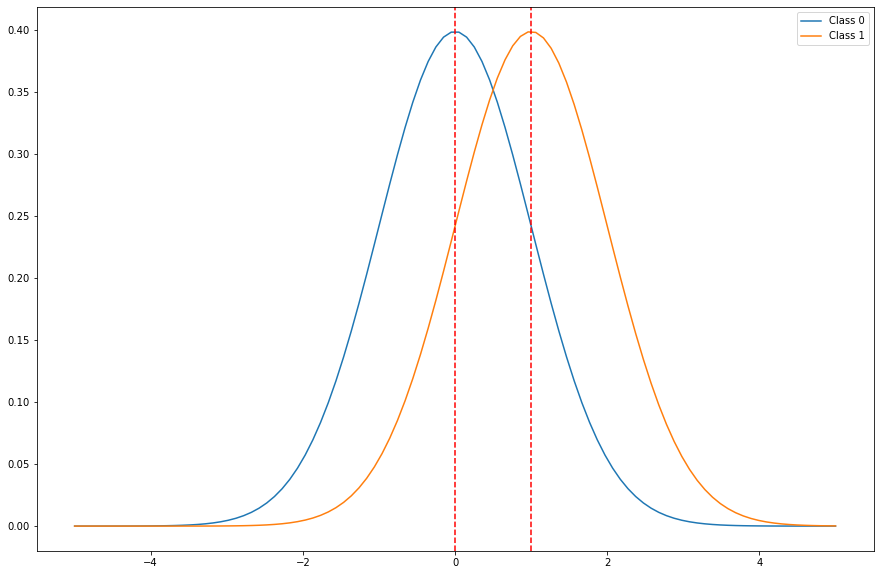

In [214]:
# plot the gaussian for class 0
plt.figure(figsize=(15, 10))
plt.plot(x, np.exp(-(x - parameters0['mean']) ** 2 / (2 * parameters0['variance'])) / np.sqrt(2 * np.pi * parameters0['variance']))
plt.plot(x, np.exp(-(x - parameters1['mean']) ** 2 / (2 * parameters1['variance'])) / np.sqrt(2 * np.pi * parameters1['variance']))
# draw a vertical line at means of class 0 and class 1
plt.axvline(x=parameters0['mean'], color='r', linestyle='--')
plt.axvline(x=parameters1['mean'], color='r', linestyle='--')
# add the legend
plt.legend(['Class 0', 'Class 1'])

plt.show()

This above figure is the pdfs for the positive and negative class without considering the prior probability.

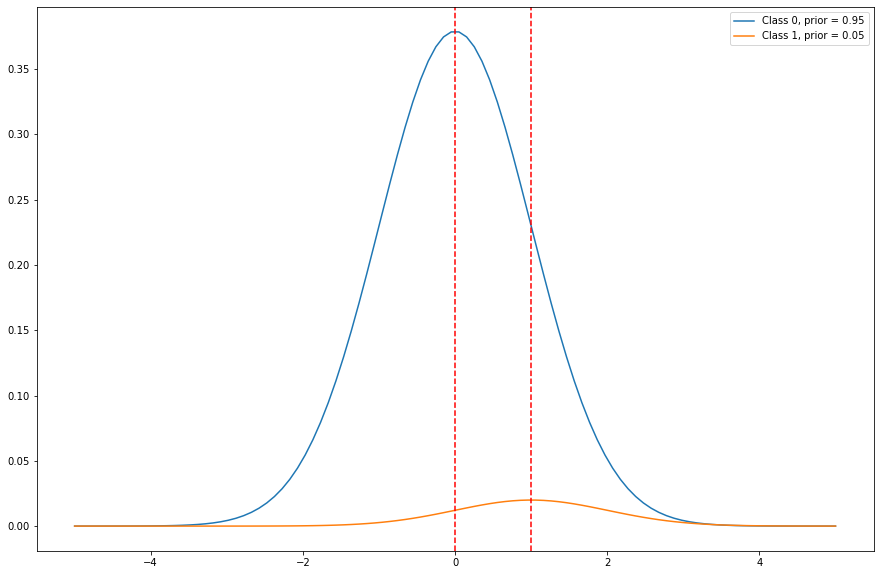

In [215]:
# plot the same figure with their prior probabilities
plt.figure(figsize=(15, 10))
plt.plot(x, np.exp(-(x - parameters0['mean']) ** 2 / (2 * parameters0['variance'])) / np.sqrt(2 * np.pi * parameters0['variance']) * parameters0['prior'])
plt.plot(x, np.exp(-(x - parameters1['mean']) ** 2 / (2 * parameters1['variance'])) / np.sqrt(2 * np.pi * parameters1['variance']) * parameters1['prior'])
# draw a vertical line at means of class 0 and class 1
plt.axvline(x=parameters0['mean'], color='r', linestyle='--')
plt.axvline(x=parameters1['mean'], color='r', linestyle='--')
# add the legend
plt.legend(['Class 0, prior = ' +  str(parameters0['prior']), 'Class 1, prior = ' + str(parameters1['prior'])])
# mark the values of the means on the vertical lines
plt.show()



We have now multiplied the pdfs with the prior probability. We can see that the pdf of class 1 is very flat. This is similar cases as in disease detection where the pdf of the positive class is very flat.

## Generating the data
Now we will generate samples out of the pdfs so we can calculate the performance metrics analytically using those samples. We have used Box-Muller transform to generate the samples. We have used same method for generating samples for both the classes. We have used same method in section 1 Problem 3. We have refered this [video](https://www.youtube.com/watch?v=DSWM7-9gK7s) for the implementation of the Box Muller method.

In [216]:
from random import random
from math import log, cos, sin, sqrt, pi
def sample_standard_normal():
    mu = 0
    sigma = 1
    # we will write our own implementation of np.random.normal()
    # we will use the Box-Muller transform
    r = sqrt(-2*log(random()))
    a = 2*pi*random()
    return sigma*r*cos(a) + mu, sigma*r*sin(a) + mu
  
X = []
for _ in range(50000):
    r = sample_standard_normal()
    X.append(r[0])
    X.append(r[1])


In [217]:
# generate data points for class 0 and 1
x0 = []
x1 = []
sample = []
for i in range(len(X)):
    toss = np.random.random()
    if toss < parameters0['prior']:
        x0.append(X[i]*parameters0['variance'] + parameters0['mean'])
        sample.append([X[i]*parameters0['variance'] + parameters0['mean'], 0])
    else:
        x1.append(X[i]*parameters1['variance'] + parameters1['mean'])
        sample.append([X[i]*parameters1['variance'] + parameters1['mean'], 1])


In [218]:
df = pd.DataFrame(sample, columns=['x', 'y'])

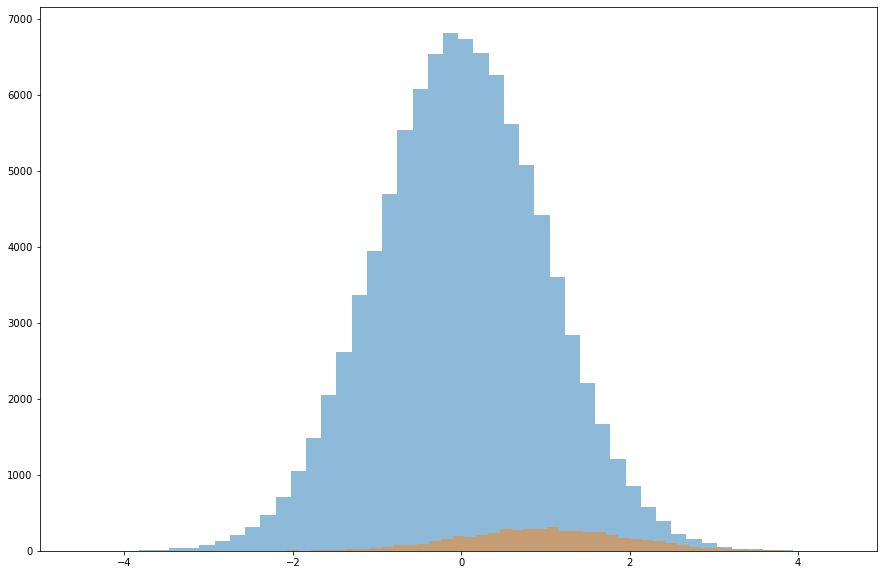

In [219]:
# plot the data points as histograms
plt.figure(figsize=(15, 10))
# plot distribution for class 0 and 1
plt.hist(x0, bins=50, alpha=0.5, label='Class 0')
plt.hist(x1, bins=50, alpha=0.5, label='Class 1')
plt.show()


Now after plotting the samples we can see that the distribution of the samples is very close to the pdfs. This validates our method of generating samples.

## Bayes Classifier
Now we will use the Bayes Classifier to classify the samples. We have implemented the basic classifier below so that it is easy to understand, the  we will use the classifier to classify the samples based on the maximum likelihood. 

In [220]:
# create a Bayesian classifier
def bayes_classifier(x, parameters):
    parameters0 = parameters[0]
    parameters1 = parameters[1]
    # calculate the likelihood of class 0
    likelihood0 = np.exp(-(x - parameters0['mean']) ** 2 / (2 * parameters0['variance'])) / np.sqrt(2 * np.pi * parameters0['variance'])
    # calculate the likelihood of class 1
    likelihood1 = np.exp(-(x - parameters1['mean']) ** 2 / (2 * parameters1['variance'])) / np.sqrt(2 * np.pi * parameters1['variance'])
    # calculate the posterior probability of class 0
    posterior0 = likelihood0 * parameters0['prior'] / (likelihood0 * parameters0['prior'] + likelihood1 * parameters1['prior'])
    # calculate the posterior probability of class 1
    posterior1 = likelihood1 * parameters1['prior'] / (likelihood0 * parameters0['prior'] + likelihood1 * parameters1['prior'])
    # return the class with the highest posterior probability
    if posterior0 > posterior1:
        return 0
    else:
        return 1
        

In [221]:
# find the predictions_bayesian 
predictions_bayesian = []
for i in range(len(sample)):
    predictions_bayesian.append(bayes_classifier(sample[i][0],[parameters0, parameters1]))



### Performance metrics
Onces all points has been classified we can calculate the performance metrics with the help of the true class labels. Some of the important metrics are: 
accuracy, precision, recall, f1-score, and confusion matrix.

When classes are not balanced, the accuracy is not very good estimation so we need these other metrics to estimate the performance of the classifier.

We have created a class which calculates all the performance metrics and keeps it at one place. This helps us better organize the code and make it easy to understand.

In [222]:
# find the accuracy
accuracy = 0
for i in range(len(sample)):
    if predictions_bayesian[i] == sample[i][1]:
        accuracy += 1
accuracy = accuracy / len(sample)
print('Accuracy: ', accuracy)

Accuracy:  0.9482


In [223]:
# calculate performance metrics
class PerformanceMetrics:
    def __init__(self, predictions, actual):
        self.predictions = predictions
        self.actual = actual

    def accuracy(self):
        accuracy = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == self.actual[i]:
                accuracy += 1
        return accuracy / len(self.predictions)

    def precision(self):
        tp = 0
        fp = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 1 and self.actual[i] == 1:
                tp += 1
            if self.predictions[i] == 1 and self.actual[i] == 0:
                fp += 1
        if tp + fp == 0:
            return 0
        return tp / (tp + fp)

    def recall(self):
        tp = 0
        fn = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 1 and self.actual[i] == 1:
                tp += 1
            if self.predictions[i] == 0 and self.actual[i] == 1:
                fn += 1
        if tp + fn == 0:
            return 0
        return tp / (tp + fn)

    def f1_score(self):
        p = self.precision()
        r = self.recall()
        if p + r == 0:
            return 0
        return 2 * p * r / (p + r)

    def true_positive_rate(self):
        tp = 0
        fn = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 1 and self.actual[i] == 1:
                tp += 1
            if self.predictions[i] == 0 and self.actual[i] == 1:
                fn += 1
        if tp + fn == 0:
            return 0
        return tp / (tp + fn)

    def true_negative_rate(self):
        tn = 0
        fp = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 0 and self.actual[i] == 0:
                tn += 1
            if self.predictions[i] == 1 and self.actual[i] == 0:
                fp += 1
        if tn + fp == 0:
            return 0
        return tn / (tn + fp)


    def false_positive_rate(self):
        fp = 0
        tn = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 1 and self.actual[i] == 0:
                fp += 1
            if self.predictions[i] == 0 and self.actual[i] == 0:
                tn += 1
        if tp + tn == 0:
            return 0
        return fp / (fp + tn)

    def false_negative_rate(self):
        fn = 0
        tp = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 0 and self.actual[i] == 1:
                fn += 1
            if self.predictions[i] == 1 and self.actual[i] == 1:
                tp += 1
        if tp + fn == 0:
            return 0
        return fn / (fn + tp)

    
    
    def confusion_matrix(self):
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 1 and self.actual[i] == 1:
                tp += 1
            if self.predictions[i] == 0 and self.actual[i] == 1:
                fn += 1
            if self.predictions[i] == 1 and self.actual[i] == 0:
                fp += 1
            if self.predictions[i] == 0 and self.actual[i] == 0:
                tn += 1
        return tp, fp, tn, fn


In [224]:
pm = PerformanceMetrics(predictions_bayesian, [i[1] for i in sample])
tp, fp, tn, fn = pm.confusion_matrix()
print('Confusion Matrix:')
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)
print('Accuracy: ', pm.accuracy())
print('Precision: ', pm.precision())
print('Recall: ', pm.recall())
print('F1 Score: ', pm.f1_score())

Confusion Matrix:
True Positives:  24
False Positives:  30
True Negatives:  94796
False Negatives:  5150
Accuracy:  0.9482
Precision:  0.4444444444444444
Recall:  0.004638577502899111
F1 Score:  0.009181331293037491


### Analysing the performance metrics
We can see that accuracy is very good here, but suppose this was a case similar to desease detection where the classes are not balanced. Then the accuracy is not very good estimation as we want to correctly classify as many positive samples as possible.

So this classifier is not very good as mertics  such as recall and F1 score are not very good.

## Neyman Pearson Classifier
To overcome the above problem we can use Neyman Pearson Classifier. This classifier is based on the assumption that the pdfs are Gaussian. Here we find the best threshold for the classifier based on the minimum desired precision.

In [225]:
# create a Neyman Pearson Classifier.
def neyman_pearson_classifier(x, parameters, lamda):
    parameters0 = parameters[0]
    parameters1 = parameters[1]
    # calculate the likelihood of class 0
    likelihood0 = np.exp(-(x - parameters0['mean']) ** 2 / (2 * parameters0['variance'])) / np.sqrt(2 * np.pi * parameters0['variance'])
    # calculate the likelihood of class 1
    likelihood1 = np.exp(-(x - parameters1['mean']) ** 2 / (2 * parameters1['variance'])) / np.sqrt(2 * np.pi * parameters1['variance'])
    # calculate the posterior probability of class 0
    posterior0 = likelihood0 * parameters0['prior'] / (likelihood0 * parameters0['prior'] + likelihood1 * parameters1['prior'])
    # calculate the posterior probability of class 1
    posterior1 = likelihood1 * parameters1['prior'] / (likelihood0 * parameters0['prior'] + likelihood1 * parameters1['prior'])
    # return the class with the highest posterior probability
    if posterior1/ (posterior0 + posterior1) > lamda:
        return 1
    else:
        return 0

In [226]:
predictions_npc = {} 
thresholds = np.arange(0.001, 1 , 0.001)
for i in thresholds:
    print(":",end="")
    predictions_npc[i] = []
    for j in range(len(sample)):
        predictions_npc[i].append(neyman_pearson_classifier(sample[j][0], [parameters0, parameters1], i))

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [227]:
performance_npc = {}
for i in thresholds:
    pm = PerformanceMetrics(predictions_npc[i], [i[1] for i in sample])
    performance_npc[i] = {'TP_rate': pm.true_positive_rate(), 'TN_rate': pm.true_negative_rate(), 'FP_rate': pm.false_positive_rate(), 'FN_rate': pm.false_negative_rate(), 'Accuracy': pm.accuracy(), 'Precision': pm.precision(), 'Recall': pm.recall(), 'F1_score': pm.f1_score()}

### Effect of threshold
Now we will plot the mertics for diffrent thresholds for the ratio of likelihood. We will see how threshold effects the performance metrics. As we saw that the Bayes Classifier is good here only for the accuracy as classes are imbalanced.

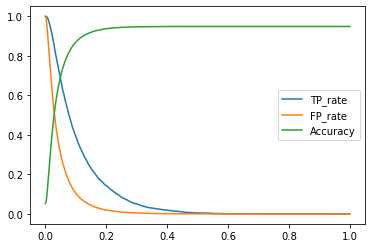

In [228]:
# plot the performance metrics for npcs
plt.plot(list(performance_npc.keys()), [performance_npc[i]['TP_rate'] for i in thresholds], label='TP_rate')
plt.plot(list(performance_npc.keys()), [performance_npc[i]['FP_rate'] for i in thresholds], label='FP_rate')
plt.plot(list(performance_npc.keys()), [performance_npc[i]['Accuracy'] for i in thresholds], label='Accuracy')
plt.legend()
plt.show()


Now we can see that the threshold effects the performance metrics. When threshold is very low, we are calling everything as positive so our true positive rate is very high, but this also makes false positive rate very high and accuracy very low.

So we can see a clear tradeoff between the two metrics.

### ROC curve
The ROC curve is a plot of the true positive rate against the false positive rate. It is a plot of the sensitivity (true positive rate) against the 1-specificity (false positive rate).

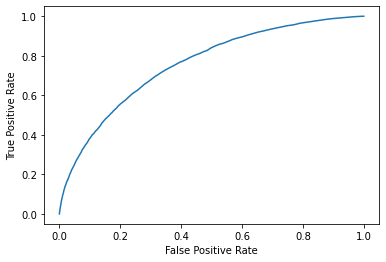

In [229]:
# plot the ROC curve
Tp =  [performance_npc[i]['TP_rate'] for i in thresholds]
Fp =  [performance_npc[i]['FP_rate'] for i in thresholds]
plt.plot(Fp, Tp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
